# AudioSet Speech models

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tools.create import create_single_models
from tools.base import (dump_collection, load_collection, 
                        flatten_collection, compute_metrics,
                        _extract_regressors)
from tools.viz import (plot_regressor, plot_regressor,
                       plot_metrics, plot_contrast_by_dataset, plot_contrast_by_analysis,
                       plot_analysis_grid)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
%matplotlib inline

In [3]:
api = Neuroscout()

## Define predictors and confounds

In [4]:
predictors = ["as-Speech"]

In [5]:
confounds = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05',  'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

## Create models

In [6]:
single_models = create_single_models(predictors, confounds)

In [7]:
single_models

{&#39;as-Speech&#39;: {&#39;Budapest&#39;: {&#39;movie&#39;: &lt;Analysis hash_id=Ma4W1 name=as-Speech dataset_id=27&gt;},
  &#39;HealthyBrainNetwork&#39;: {&#39;movieDM&#39;: &lt;Analysis hash_id=wjNy0 name=as-Speech dataset_id=8&gt;},
  &#39;SchematicNarrative&#39;: {&#39;perception&#39;: &lt;Analysis hash_id=9L2Ez name=as-Speech dataset_id=20&gt;},
  &#39;studyforrest&#39;: {&#39;movie&#39;: &lt;Analysis hash_id=97pGO name=as-Speech dataset_id=11&gt;},
  &#39;Raiders&#39;: {&#39;raiders&#39;: &lt;Analysis hash_id=wkVgy name=as-Speech dataset_id=10&gt;},
  &#39;Life&#39;: {&#39;life&#39;: &lt;Analysis hash_id=M4jOg name=as-Speech dataset_id=9&gt;},
  &#39;ParanoiaStory&#39;: {&#39;story&#39;: &lt;Analysis hash_id=A25dp name=as-Speech dataset_id=18&gt;},
  &#39;Sherlock&#39;: {&#39;sherlockPart1&#39;: &lt;Analysis hash_id=MNQjl name=as-Speech dataset_id=21&gt;},
  &#39;SherlockMerlin&#39;: {&#39;MerlinMovie&#39;: &lt;Analysis hash_id=M55bx name=as-Speech dataset_id=5&gt;,
   &#39;Sher

In [8]:
filename = Path('models') / 'audioset_speech.json'

In [9]:
dump_collection(single_models, filename)

In [10]:
single_models = load_collection(filename)

### Reports

In [17]:
for (pred, dataset, task), model in flatten_collection(single_models):
    model.generate_report(run_id=model.runs[0])

In [ ]:
for p in predictors:
    single_models[p]['Raiders']['raiders'].plot_report()

## Inspect regressors

In [18]:
df = _extract_regressors(single_models)

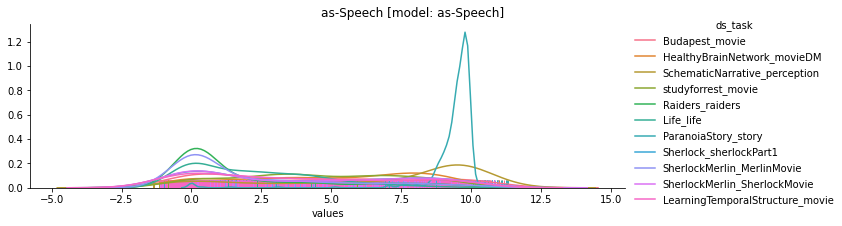

In [19]:
plot_regressor('distribution', df=df, split_by='hue', color=None, aspect=3, hist=None, rug=True)

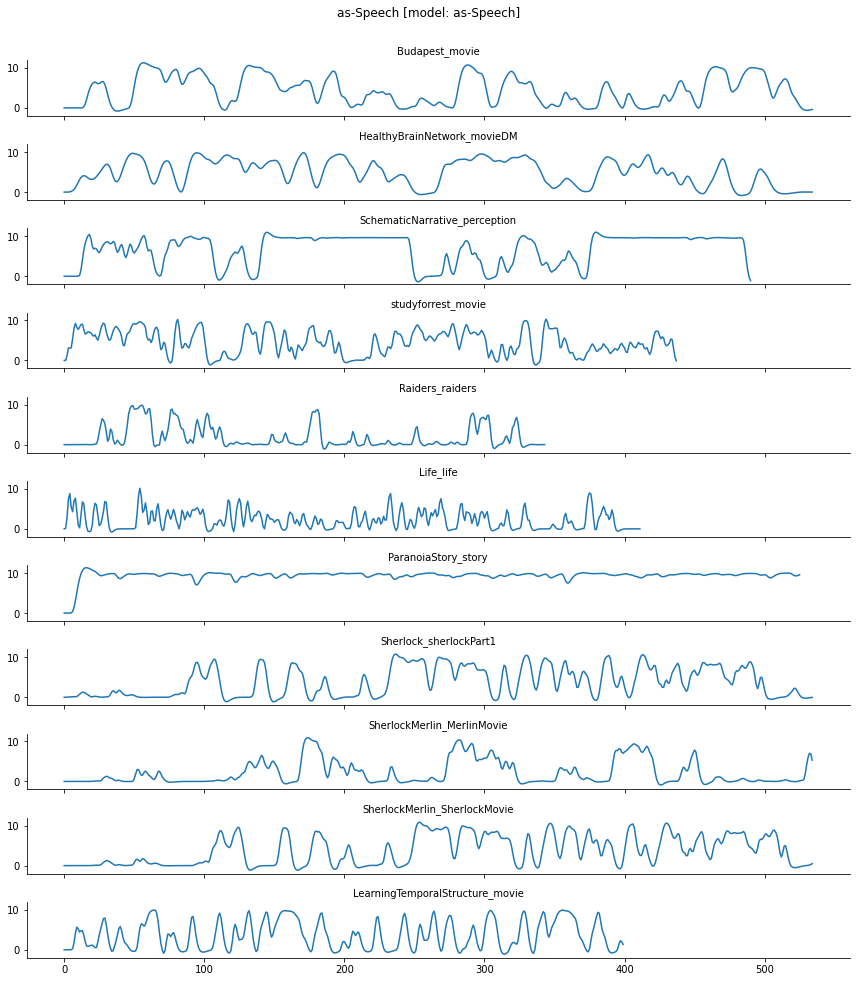

In [20]:
plot_regressor('timeseries', df=df, split_by='row', height=1.2, aspect=10)

In [21]:
agg_df = compute_metrics(df=df, aggfunc=[np.mean, np.std, np.var])

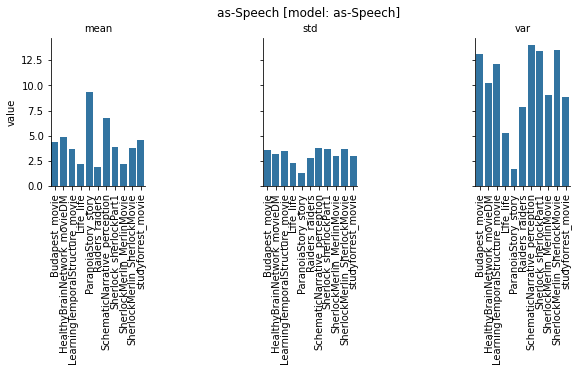

In [22]:
plot_metrics(agg_df, metrics=['mean', 'std', 'var'],
             sns_function='barplot', height=3, aspect=1)

## Compile models

In [23]:
for (pred, dataset, task), model in flatten_collection(single_models):
    if model.get_status()['status'] == 'DRAFT':
        model.private = False
        model.push()
        model.compile()
    else:
        print(f'Status: {model.status} for {pred}, {dataset}, {task}')

Status: PENDING for as-Speech, Budapest, movie
Status: PENDING for as-Speech, HealthyBrainNetwork, movieDM
Status: PASSED for as-Speech, LearningTemporalStructure, movie
Status: PENDING for as-Speech, Life, life
Status: PASSED for as-Speech, ParanoiaStory, story
Status: PENDING for as-Speech, Raiders, raiders
Status: PENDING for as-Speech, SchematicNarrative, perception
Status: PASSED for as-Speech, Sherlock, sherlockPart1
Status: PASSED for as-Speech, SherlockMerlin, MerlinMovie
Status: PASSED for as-Speech, SherlockMerlin, SherlockMovie
Status: PENDING for as-Speech, studyforrest, movie


In [13]:
' '.join([model.hash_id for (pred, dataset, task), model in flatten_collection(single_models)])

&#39;Ma4W1 wjNy0 AZ4QK M4jOg A25dp wkVgy 9L2Ez MNQjl M55bx 9eyk7 97pGO&#39;

## Results

In [11]:
flat_models = flatten_collection(single_models)

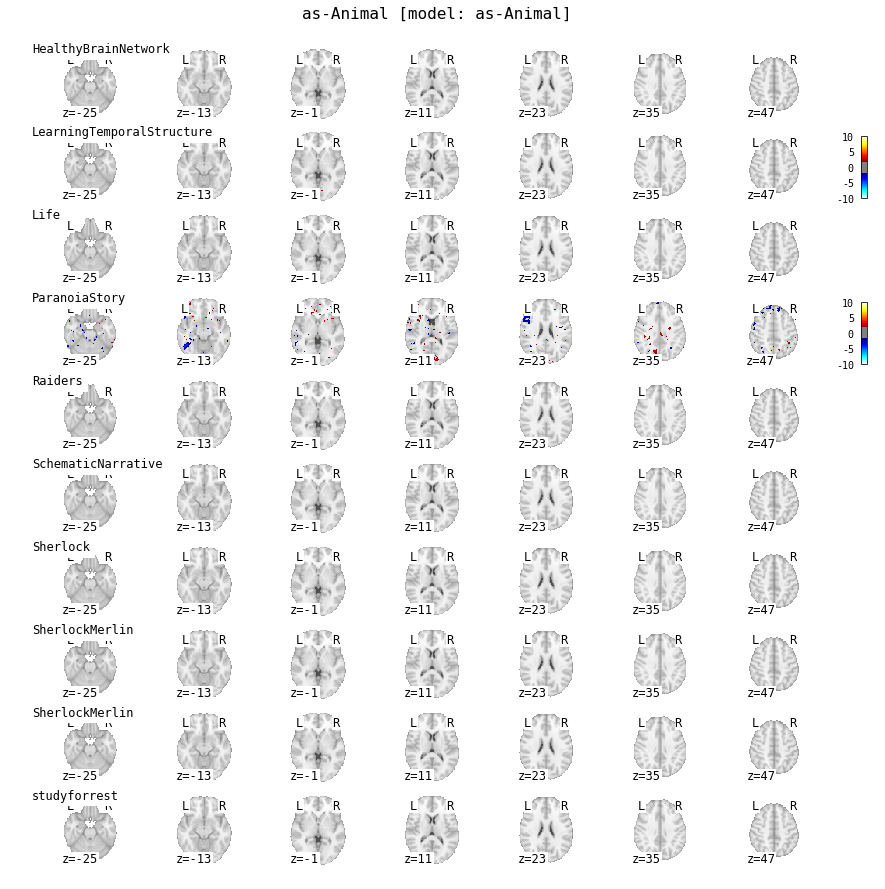

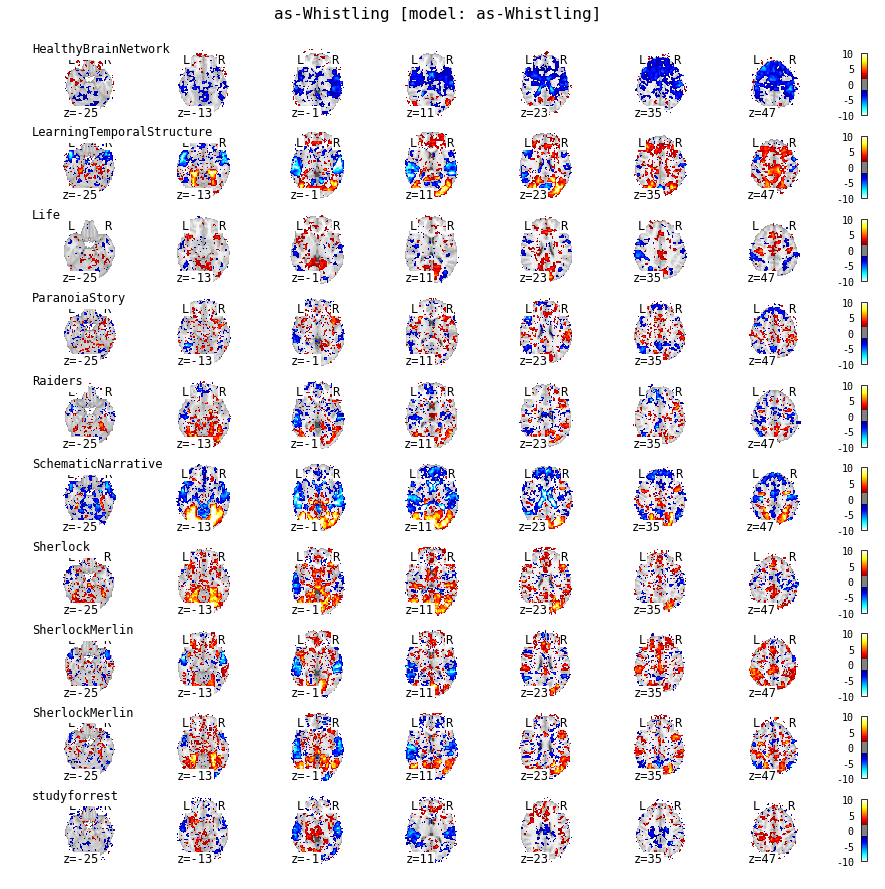

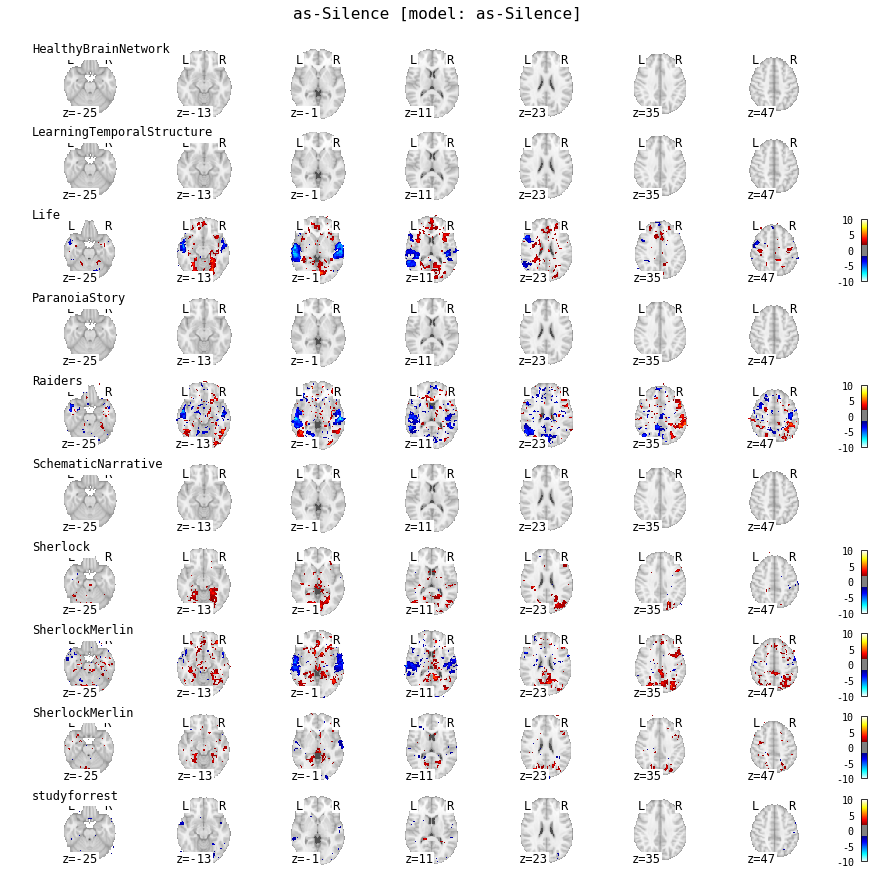

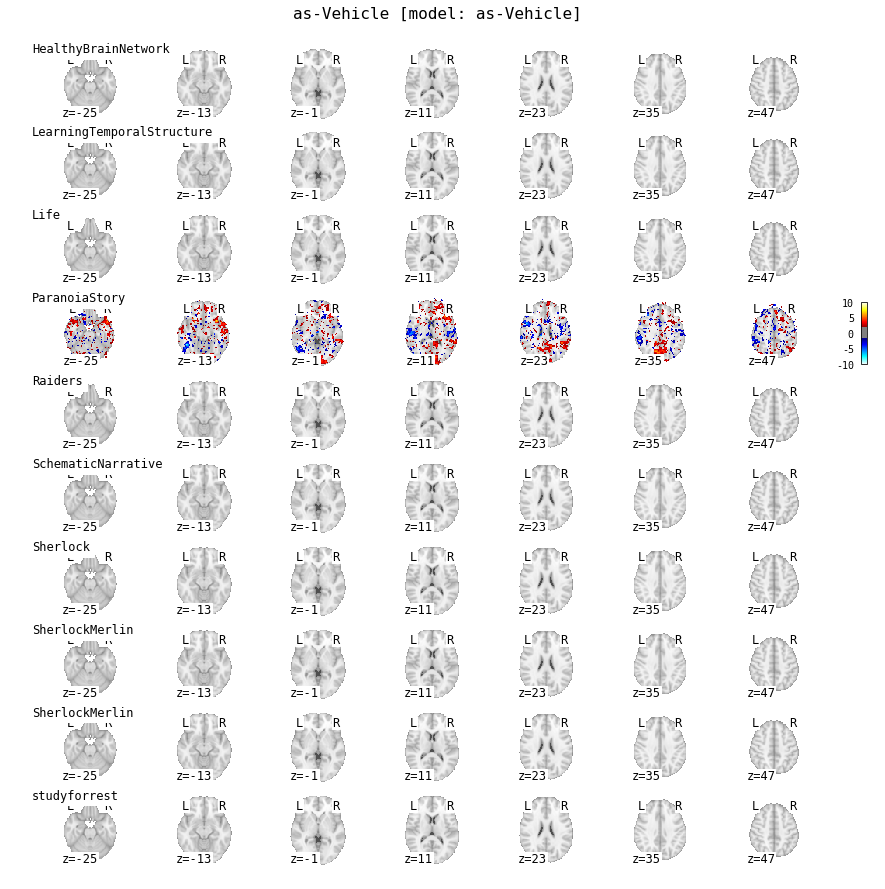

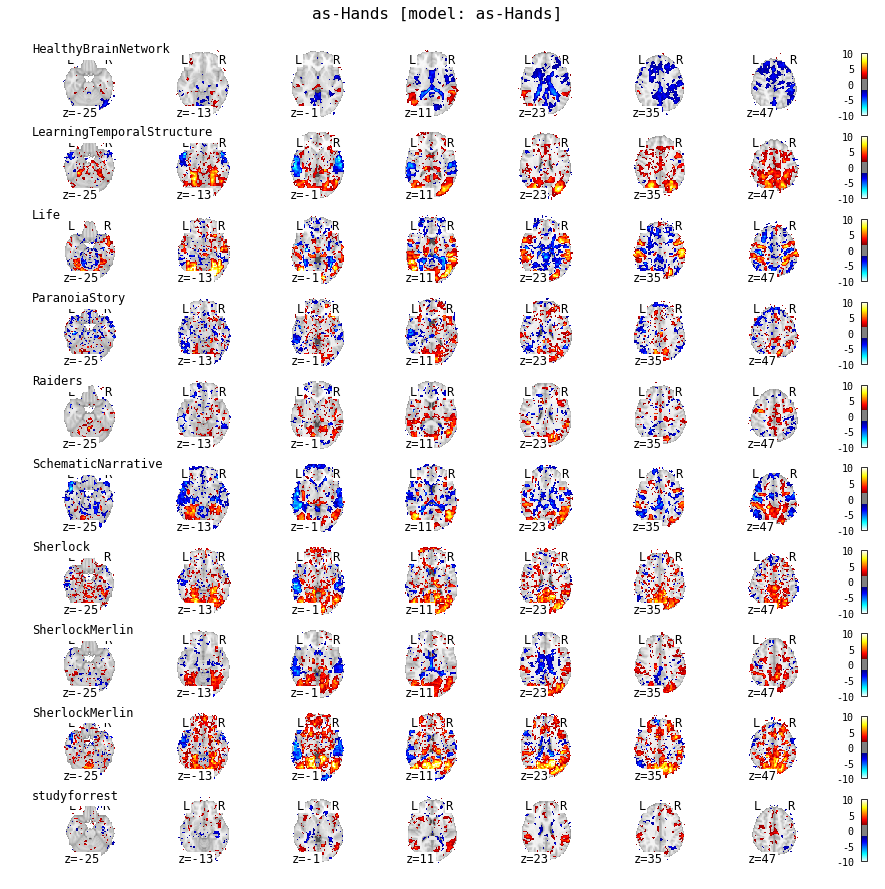

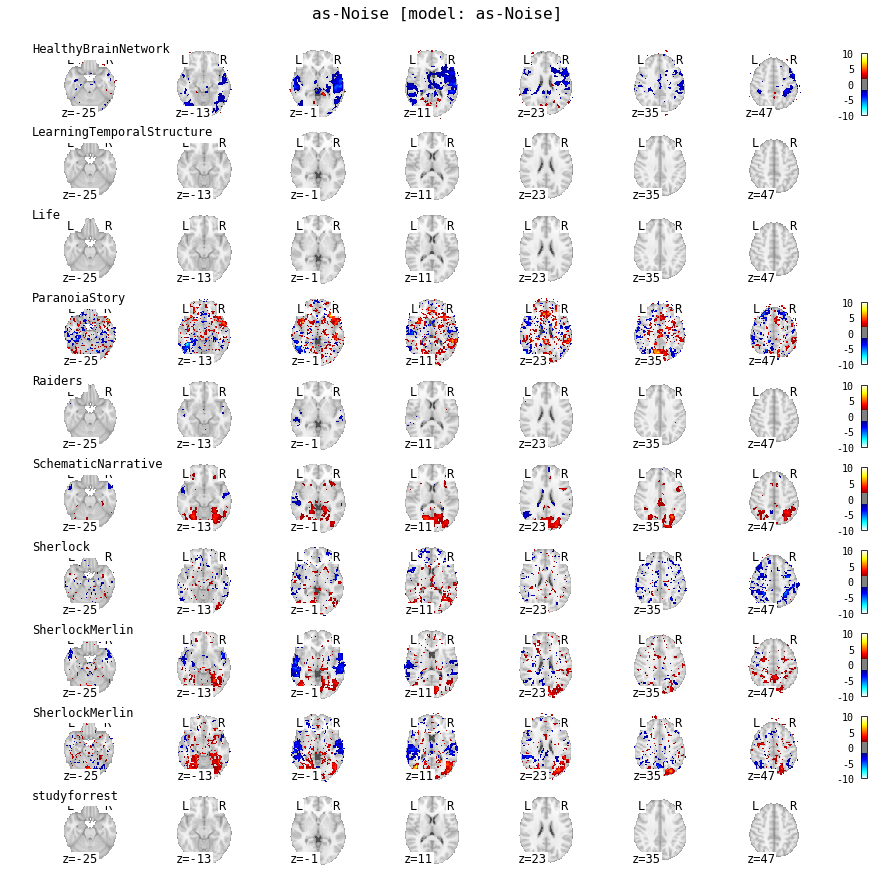

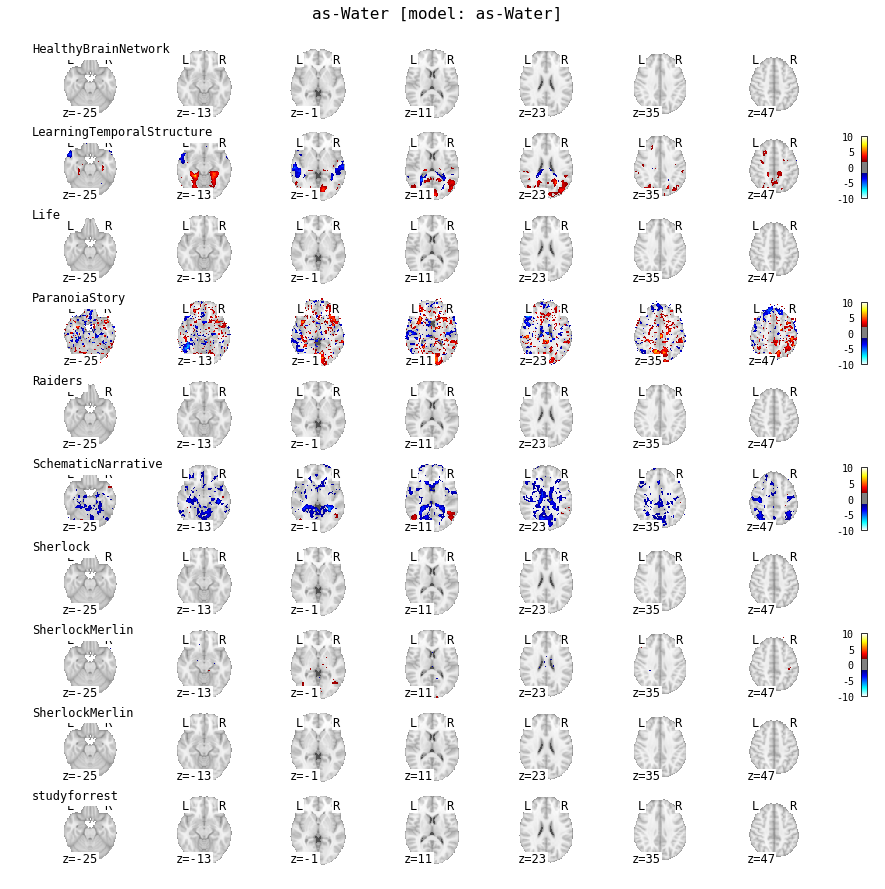

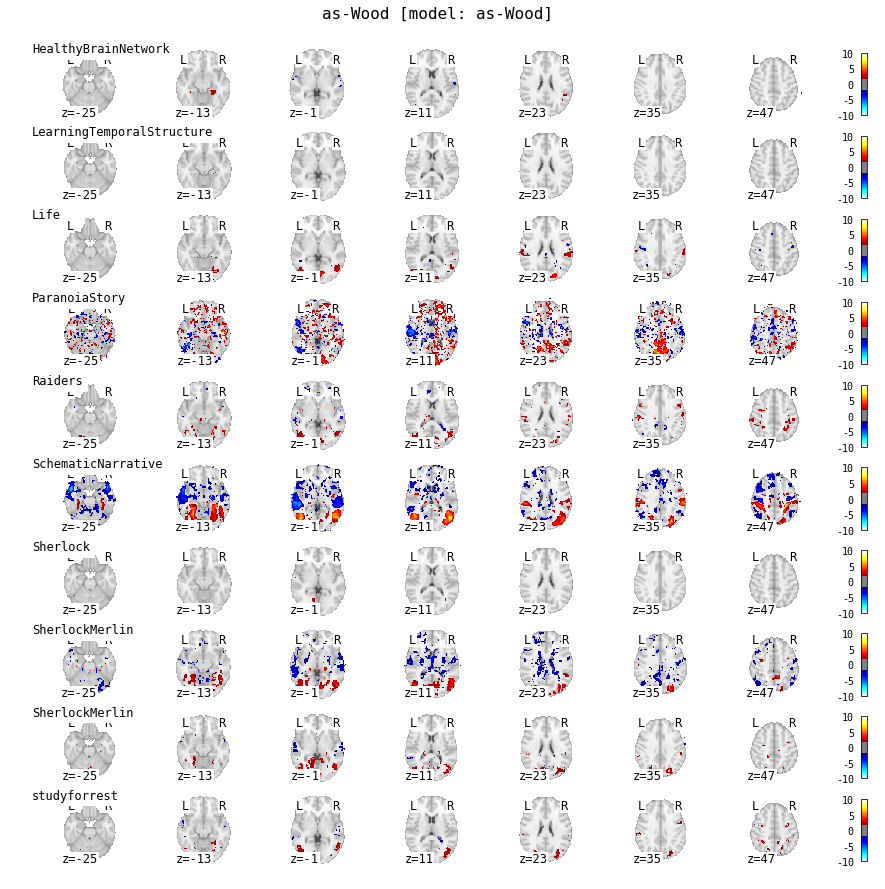

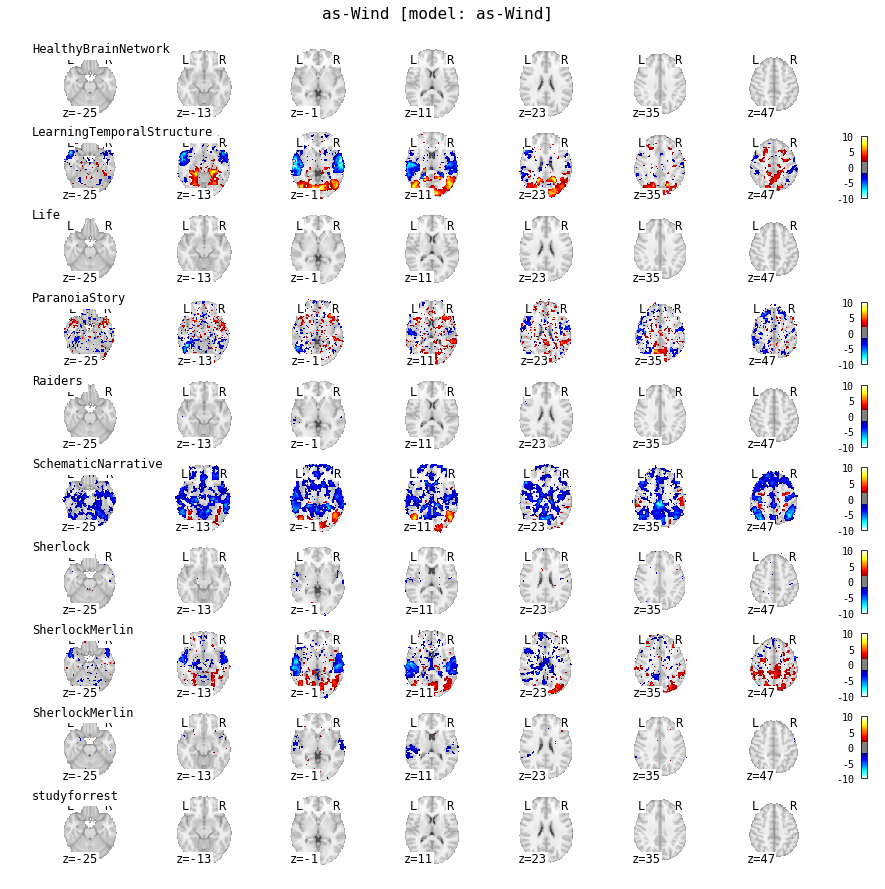

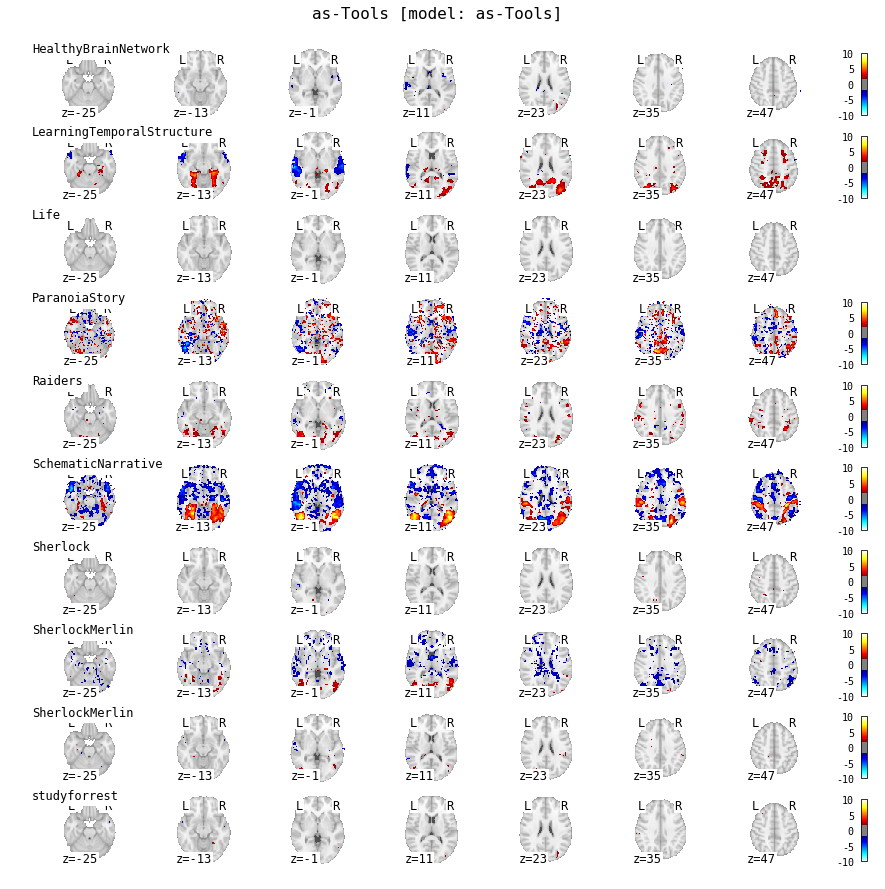

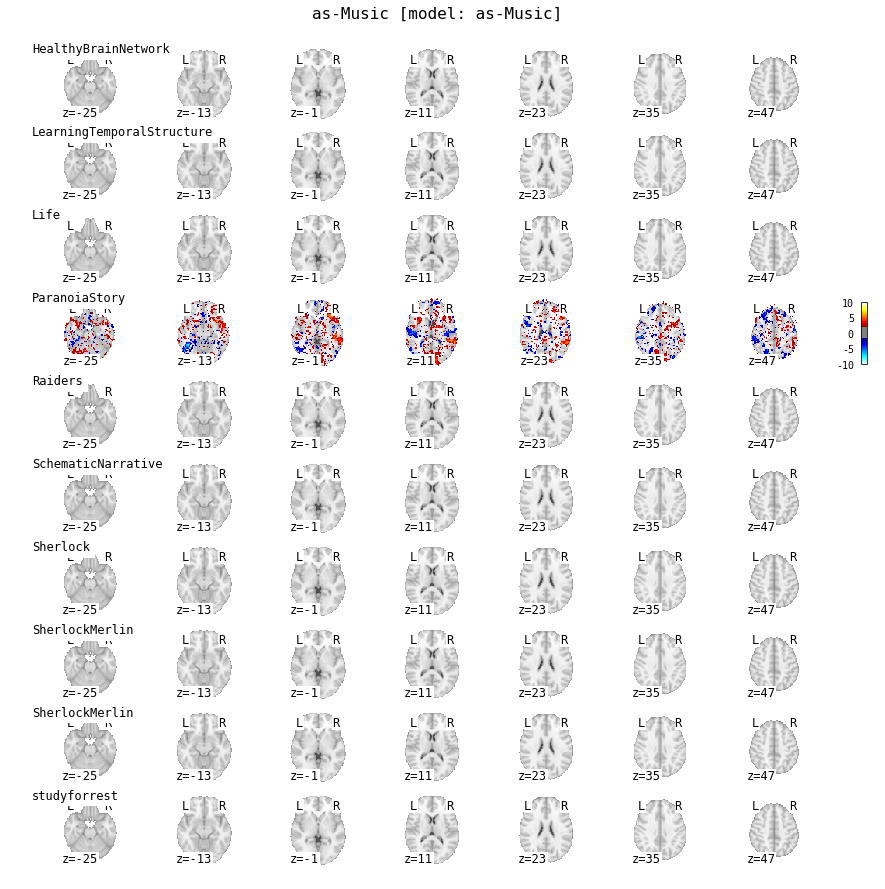

In [12]:
import warnings; warnings.simplefilter('ignore')
plt.rcParams.update({'font.family': 'monospace'})
plot_contrast_by_analysis(flat_models,
                          contrasts=predictors,
                          vmax=10, draw_cross=True, 
                          figsize=(15,15), colorbar=True, 
                          threshold=1.96)